In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [2]:
df = pd.DataFrame( 
    {
        'A' : ['a','b','c','a','b'],
        'B' : ['1','2','3','1','0']
    }
)
le = LabelEncoder()

In [ ]:
le.fit(df['A'])
le.classes_
df['le_A'] = le.transform(df['A'])          # 라벨링
le.transform(['a','b'])                     # 변환
le.fit_transform(df['A'])                   #
le.inverse_transform([1,2,2,2])
df

In [16]:
mm = MinMaxScaler()             # MinMaxSclaer는 데이터의 Min, Max를 찾아서 Min, Max의 범위를 0 ~ 1 범위로 바꾼다.
ss = StandardScaler()           # StandardScaler는 데이터의 평균을 찾아서 bias하여 평균을 0으로 바꾸고, 분산과 표준편차로 표현한다.
rs = RobustScaler()             # RobustScaler는 데이터의 오염도를 낮추기 위해 사분위를 사용해서 제한한다.

df = pd.DataFrame({
        'A' : [-0.1, 0., 0.1, 0.2, 0.3, 0.4, 1.0, 1.1, 5, 5]
})

df_scaler = df.copy()
df_scaler['MinMax'] = mm.fit_transform(df) 
df_scaler['Standard'] = ss.fit_transform(df)
df_scaler['Robust'] = rs.fit_transform(df)
df_scaler

,A,MinMax,Standard,Robust
0,-0.1,0.000000,-0.741790,-0.473684
1,0.0,0.019608,-0.688805,-0.368421
2,0.1,0.039216,-0.635820,-0.263158
3,0.2,0.058824,-0.582835,-0.157895
4,0.3,0.078431,-0.529850,-0.052632
5,0.4,0.098039,-0.476865,0.052632
6,1.0,0.215686,-0.158955,0.684211
7,1.1,0.235294,-0.105970,0.789474
8,5.0,1.000000,1.960445,4.894737
9,5.0,1.000000,1.960445,4.894737


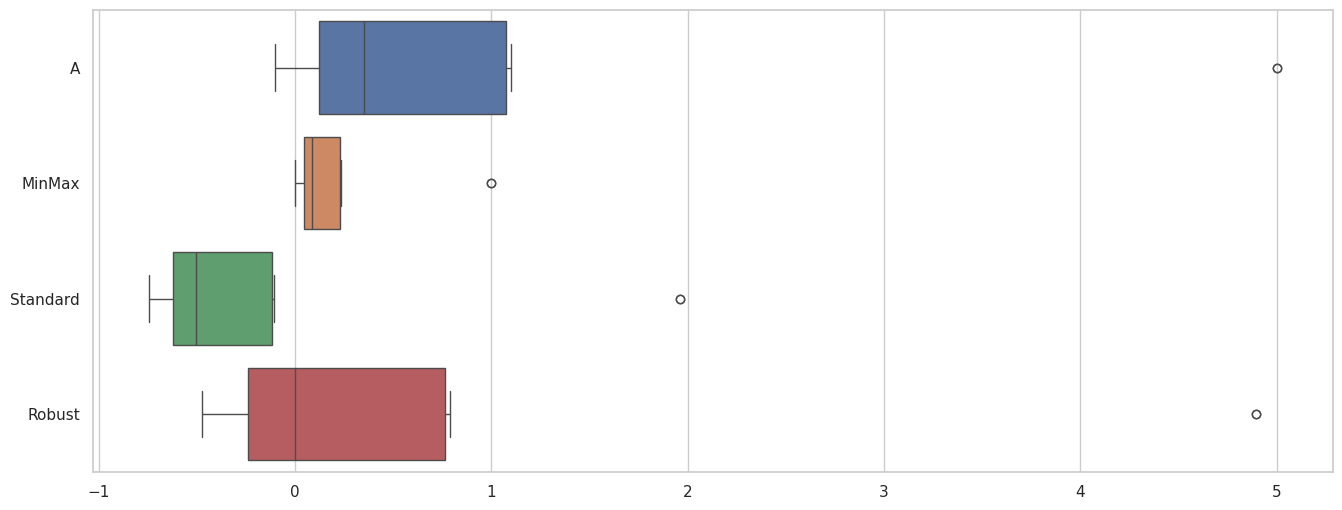

In [17]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(16,6))
sns.boxplot(data=df_scaler, orient='h');